In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon_bestsellers.csv')

In [3]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [4]:
df.groupby('Genre').count()

,Name,Author,User Rating,Reviews,Price,Year
Genre,,,,,,
Fiction,240,240,240,240,240,240
Non Fiction,310,310,310,310,310,310


In [5]:
df.groupby(['Genre'])['Price'].mean()

Genre
Fiction        10.850000
Non Fiction    14.841935
Name: Price, dtype: float64

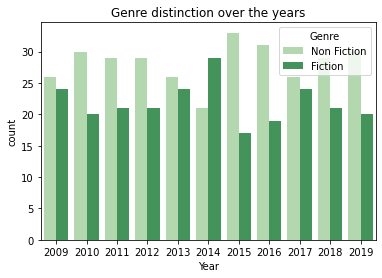

In [6]:
sns.countplot(x='Year', hue='Genre', data=df, palette= 'Greens')
plt.title('Genre distinction over the years')
plt.savefig("Genre_Year.png", transparent=True)

In [7]:
different_Authors = df['Author']
different_Authors.drop_duplicates()

0                      JJ Smith
1                  Stephen King
2            Jordan B. Peterson
3                 George Orwell
4      National Geographic Kids
                 ...           
537              Cheryl Strayed
538                 Ken Follett
539                 Geneen Roth
540               R. J. Palacio
546                 Jen Sincero
Name: Author, Length: 248, dtype: object

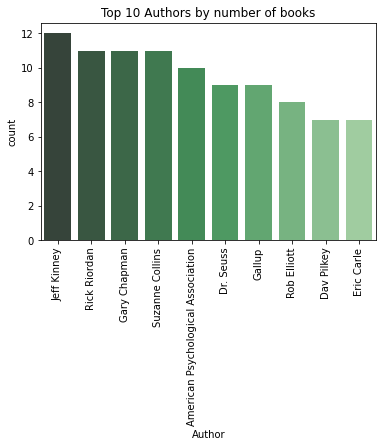

In [8]:
sns.countplot(x = 'Author', data = df, order = df['Author'].value_counts().iloc[: 10].index, palette = 'Greens_d')
plt.xticks(rotation = 90)
plt.title('Top 10 Authors by number of books')
plt.savefig("Top10Authors.png", transparent=True)

In [38]:
Reviews_sorted = df.sort_values(by = ['Reviews'], ascending=False)
Reviews_sorted_nodup = Reviews_sorted.drop_duplicates('Name')
top10_pop = Reviews_sorted_nodup.head(10)
Reviews_sorted_nodup.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
437,The Nightingale: A Novel,Kristin Hannah,4.8,49288,11,2015,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14,2012,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction


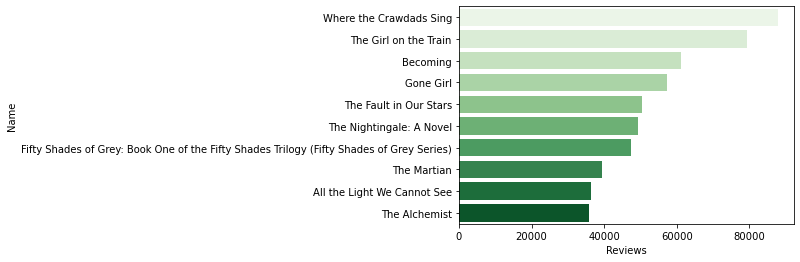

In [43]:
sns.barplot(x=top10_pop['Reviews'], y=top10_pop['Name'], palette= 'Greens')
plt.savefig("Top10popular.png", transparent=True)

In [54]:
best_Rated = Reviews_sorted_nodup.sort_values(by = ['User Rating'], ascending=False)
best_Rated.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
288,Rush Revere and the Brave Pilgrims: Time-Trave...,Rush Limbaugh,4.9,7150,12,2013,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
289,Rush Revere and the First Patriots: Time-Trave...,Rush Limbaugh,4.9,3836,12,2014,Fiction
157,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,4.9,10052,22,2016,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
156,Harry Potter and the Prisoner of Azkaban: The ...,J.K. Rowling,4.9,3146,30,2017,Fiction
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction


In [50]:
df.nunique()

Name           350
Author         248
User Rating     14
Reviews        345
Price           40
Year            11
Genre            2
dtype: int64